In [6]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 42s 20ms/step - loss: 0.2625 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1061 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0721 - accuracy: 0.9776


In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 6s 17ms/step - loss: 0.1000 - accuracy: 0.9682
0.1000269204378128 0.9682000279426575


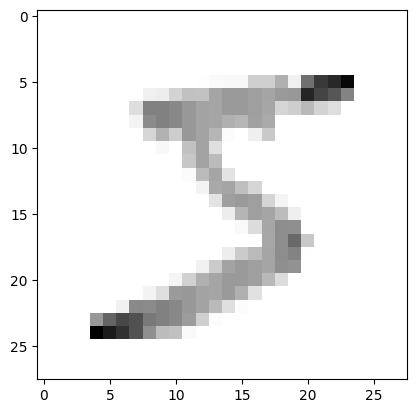

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [11]:
import os
model.save(os.path.join('k1-data', 'epic_num_reader.model'))

INFO:tensorflow:Assets written to: k1-data\epic_num_reader.model\assets


In [13]:
new_model = tf.keras.models.load_model(os.path.join('k1-data', 'epic_num_reader.model'))

In [15]:
predictions = new_model.predict([x_test])
print(predictions)
print(len(predictions))

313/313 [==============================] - 4s 12ms/step
[[9.2272884e-08 1.0739246e-06 8.6097454e-05 ... 9.9981827e-01
  5.6823097e-07 3.9674362e-07]
 [5.1286806e-09 7.9900574e-06 9.9998629e-01 ... 2.3050631e-10
  1.7982310e-07 2.3743199e-12]
 [6.6388799e-07 9.9877113e-01 4.8030637e-05 ... 2.7178361e-05
  6.8281282e-04 2.6166503e-05]
 ...
 [3.3043079e-10 2.4187483e-07 5.8362506e-09 ... 1.7094089e-06
  6.8124987e-06 7.1585848e-05]
 [1.2958563e-07 2.7533636e-07 8.8916892e-09 ... 3.1144285e-07
  4.9688405e-04 1.3740494e-08]
 [4.1028475e-06 1.0552846e-09 1.1624971e-07 ... 6.6487676e-11
  1.6977820e-08 6.2859704e-09]]
10000


6 6


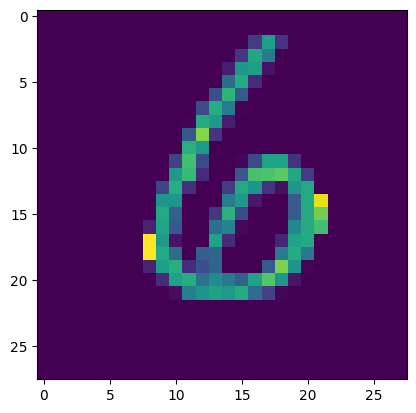

In [44]:
import numpy as np
import random

while True:
    sample_image = random.randrange(0, 10000)
    print(np.argmax(predictions[sample_image]), y_test[sample_image])
    plt.imshow(x_test[sample_image])
    plt.show()
    break